<a href="https://colab.research.google.com/github/YuriiKlim/AI/blob/Lesson8/HW8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [796]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn import model_selection
from sklearn import tree
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn import metrics
from sklearn.preprocessing import OrdinalEncoder
import joblib


In [797]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module2/data/ship_passengers.csv",
                 index_col="Unnamed: 0")

In [798]:
df

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [799]:
#df = df[['pclass', 'age', 'embarked', 'fare']]
df.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [800]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    891 non-null    int64  
 1   sex       891 non-null    object 
 2   age       714 non-null    float64
 3   sibsp     891 non-null    int64  
 4   parch     891 non-null    int64  
 5   fare      891 non-null    float64
 6   embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 55.7+ KB


In [801]:
df.describe()

,pclass,age,sibsp,parch,fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


# Завдання 1
Очистіть дані від викидів(лише `fare`), розділіть на тренувальну та тестову чатини

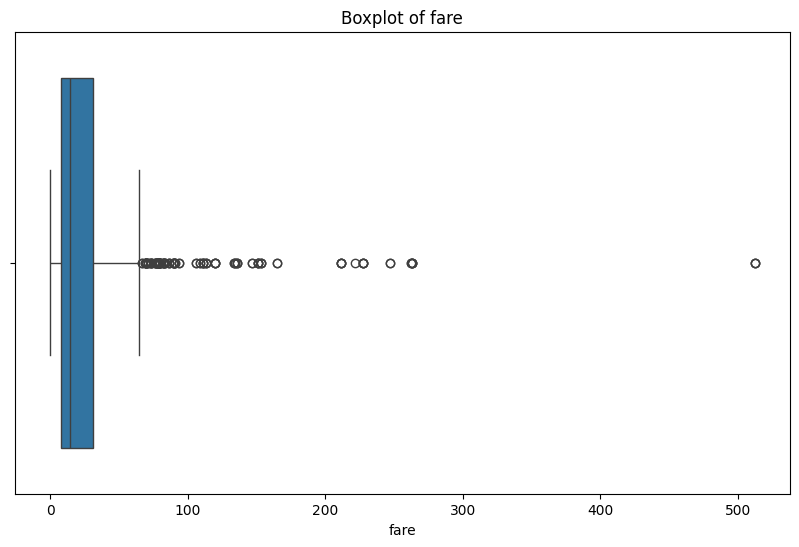

In [802]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['fare'])
plt.title(f'Boxplot of fare')
plt.xlabel('fare')
plt.show()

In [803]:
df = df[df['fare'] <= 60]

In [804]:
# Q1 = df['fare'].quantile(0.25)
# Q3 = df['fare'].quantile(0.75)
# IQR = Q3 - Q1

# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# df = df[(df['fare'] >= lower_bound) & (df['fare'] <= upper_bound)]

# df.describe()

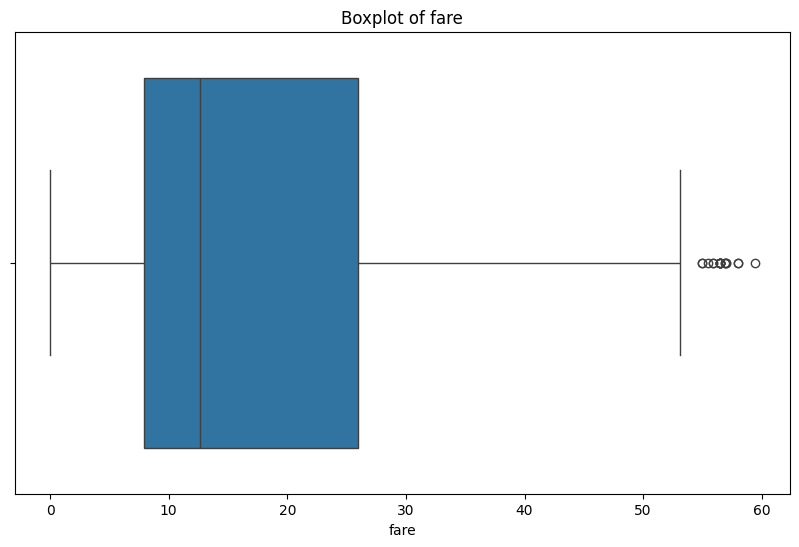

In [805]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['fare'])
plt.title(f'Boxplot of fare')
plt.xlabel('fare')
plt.show()

In [806]:
X = df.drop(columns='fare')
y = df['fare']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 615
Testing set size: 154


# Завдання 2
Створіть Pipeline для обробки даних

In [807]:
num_columns = X.select_dtypes(include="number").columns
cat_columns = X.select_dtypes(include="object").columns


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="median"))
])

numeric_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='median'))])

In [808]:
categorical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ]
)
categorical_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [809]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_columns),
        ("cat", categorical_transformer, cat_columns),
    ]
)

preprocessor.set_output(transform='pandas')
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 Index(['pclass', 'age', 'sibsp', 'parch'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['sex', 'embarked'], dtype='object'))])

# Завдання 3
Створіть остаточну модель та натренуйте її

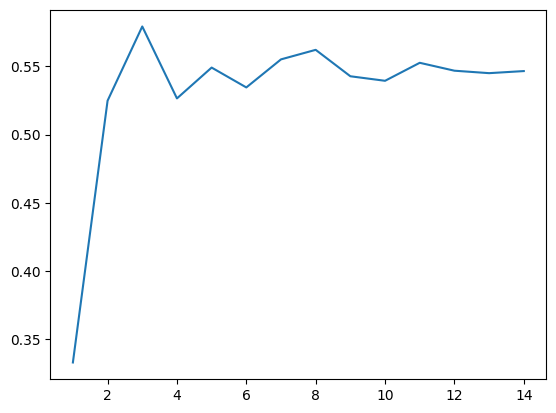

In [810]:
depths = range(1, 15)
r2 = []

for depth in depths:
  model = Pipeline(
      [("prep", preprocessor),
      ("tree", tree.DecisionTreeRegressor(max_depth=depth,
                                          random_state=42)
      )])
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  r2_value = metrics.r2_score(y_test, y_pred)
  r2.append(r2_value)


plt.plot(depths, r2)


In [811]:
model = Pipeline(
    [("prep", preprocessor),
     ("tree", tree.DecisionTreeRegressor(max_depth=8,
                                         random_state=42)
     )
     ]
)

model

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['pclass', 'age', 'sibsp', 'parch'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['sex', 'embarked'], dtype='object'))])),
                ('tree', DecisionTreeRegressor(max_depth=8, random_state=42))])

In [812]:
model.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['pclass', 'age', 'sibsp', 'parch'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['sex', 'embarked'], dtype='object'))])),
                ('tree', DecisionTreeRegressor(max_depth=8, random_state=42))])

# Завдання 4
Виведіть основні метрики моделі

In [813]:
def get_metrics(y_true, y_pred, name="model"):
  df = pd.DataFrame()

  df.loc["MAE", name] = metrics.mean_absolute_error(y_true, y_pred)
  #df.loc["MAPE", name] = metrics.mean_absolute_percentage_error(y_true, y_pred)
  df.loc["RMSE", name] = metrics.mean_squared_error(y_true, y_pred) ** 0.5
  df.loc["R2", name] = metrics.r2_score(y_true, y_pred)

  return df.round(2)

In [814]:
all_metrics = pd.DataFrame()

all_metrics["train"] = get_metrics(y_train, model.predict(X_train))
all_metrics["test"] = get_metrics(y_test, model.predict(X_test))

all_metrics

,train,test
MAE,2.60,4.65
RMSE,5.69,9.13
R2,0.80,0.56


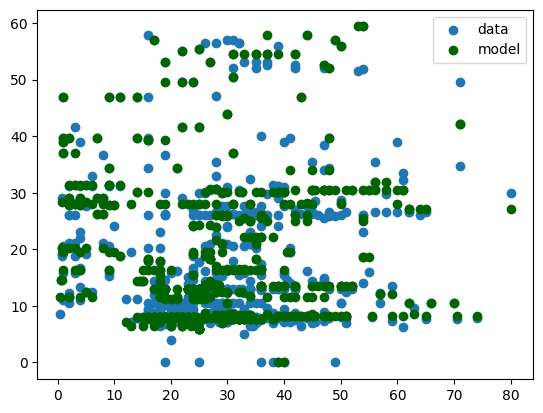

In [815]:
plt.scatter(X['age'], y, label='data')
plt.scatter(X['age'], model.predict(X), c='darkgreen', label='model')
plt.legend()

In [816]:
impotance = pd.DataFrame({'importance': model['tree'].feature_importances_},
                         index=model['tree'].feature_names_in_)

impotance.sort_values(by='importance', ascending=False, inplace=True)

impotance.round(3)

,importance
num__pclass,0.462
num__parch,0.275
num__sibsp,0.156
num__age,0.078
cat__embarked_S,0.015
cat__embarked_C,0.006
cat__sex_female,0.004
cat__embarked_Q,0.003
cat__sex_male,0.001


# Завдання 5
Змініть параметри моделі та попробуйте покращити результат

Попробуйте:
* не видаляти викиди
* змінити обробку даних(imputer та кодування категоріальних даних)
* змінити параметри дерева(глибина, кількість точок у листках тощо

In [817]:
# num_columns = X.select_dtypes(include="number").columns
# cat_columns = X.select_dtypes(include="object").columns

# numeric_transformer = Pipeline(steps=[
#     ('imputer', KNNImputer(n_neighbors=5, weights='uniform'))
# ])

# categorical_transformer = Pipeline(
#     steps=[
#         ('imputer', SimpleImputer(strategy='most_frequent')),
#         ("ordinal", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1, min_frequency=0.01))
#     ]
# )

# preprocessor = ColumnTransformer(
#     transformers=[
#         ("num", numeric_transformer, num_columns),
#         ("cat", categorical_transformer, cat_columns),
#     ]
# )

# preprocessor.set_output(transform='pandas')
# preprocessor

заміна імпутерів та енкодерів лише погіршує результат 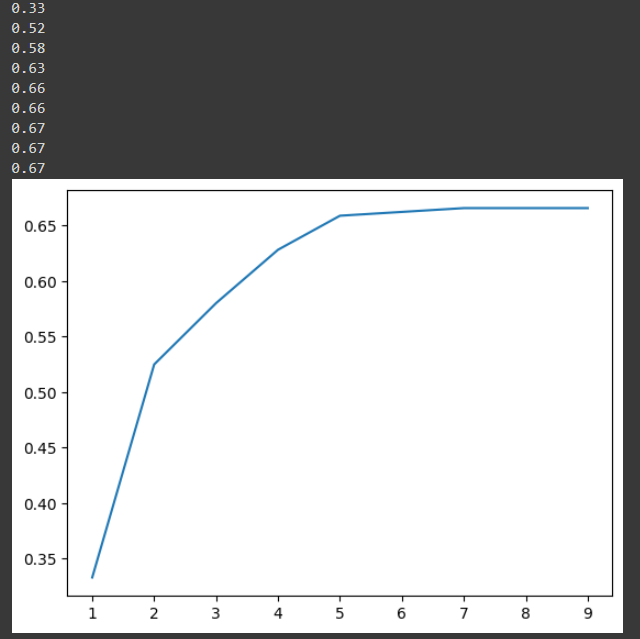

0.33
0.52
0.58
0.63
0.65
0.69
0.69
0.69
0.69


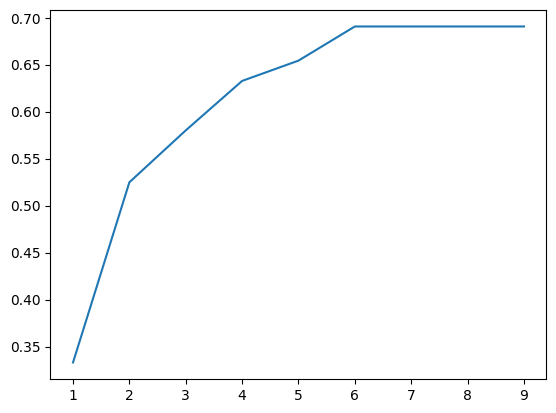

In [818]:
depths = range(1, 10)
r2 = []

for depth in depths:
  model = Pipeline(
      [("prep", preprocessor),
      ("tree", tree.DecisionTreeRegressor(max_depth=depth,
                                          random_state=42, min_samples_leaf=3,
                                          min_samples_split=3, max_leaf_nodes=20,
                                          min_impurity_decrease=0.2)
      )])
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  r2_value = metrics.r2_score(y_test, y_pred)
  r2.append(r2_value)


plt.plot(depths, r2)
for r in r2:
  print(round(r, 2))

In [819]:
model = Pipeline(
    [("prep", preprocessor),
     ("tree", tree.DecisionTreeRegressor(max_depth=depth,
                                          random_state=42, min_samples_leaf=3,
                                          min_samples_split=3, max_leaf_nodes=19,
                                          min_impurity_decrease=0.2)
     )
     ]
)

model

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['pclass', 'age', 'sibsp', 'parch'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['sex', 'embarked'], dtype='object'))])),
                ('tree',
                 DecisionTreeRegressor(max_depth=9, max_leaf_nodes=19,
                                       min_impurity_decrease=0.2,
                                       min_samples_leaf=3, min_samples_split=3,
                                       random_state=42))])

In [820]:
model.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['pclass', 'age', 'sibsp', 'parch'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['sex', 'embarked'], dtype='object'))])),
                ('tree',
                 DecisionTreeRegressor(max_depth=9, max_leaf_nodes=19,
                                       min_impurity_decrease=0.2,
                                       min_samples_leaf=3, min_samples_split=3,
                                       random_state=42))])

In [821]:
def get_metrics(y_true, y_pred, name="model"):
  df = pd.DataFrame()

  df.loc["MAE", name] = metrics.mean_absolute_error(y_true, y_pred)
  #df.loc["MAPE", name] = metrics.mean_absolute_percentage_error(y_true, y_pred)
  df.loc["RMSE", name] = metrics.mean_squared_error(y_true, y_pred) ** 0.5
  df.loc["R2", name] = metrics.r2_score(y_true, y_pred)

  return df.round(2)

In [822]:
all_metrics = pd.DataFrame()

all_metrics["train"] = get_metrics(y_train, model.predict(X_train))
all_metrics["test"] = get_metrics(y_test, model.predict(X_test))

all_metrics

,train,test
MAE,3.57,3.82
RMSE,6.71,7.69
R2,0.73,0.69


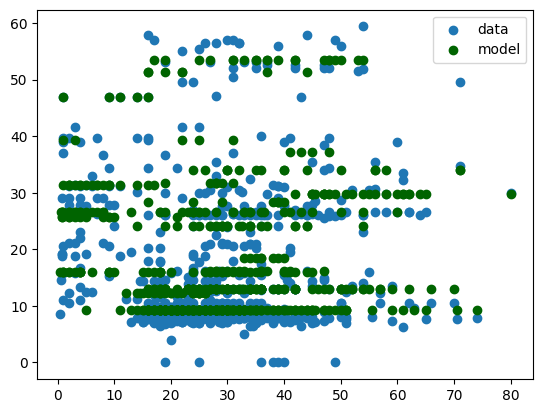

In [823]:
plt.scatter(X['age'], y, label='data')
plt.scatter(X['age'], model.predict(X), c='darkgreen', label='model')
plt.legend()

# Завдання 6
Збережіть модель

In [824]:
joblib.dump(model, 'my_model.pkl')

['my_model.pkl']

In [825]:
load_model = joblib.load('my_model.pkl')
load_model

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['pclass', 'age', 'sibsp', 'parch'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['sex', 'embarked'], dtype='object'))])),
                ('tree',
                 DecisionTreeRegressor(max_depth=9, max_leaf_nodes=19,
                                       min_impurity_decrease=0.2,
                                       min_samples_leaf=3, min_samples_split=3,
                                       random_state=42))])